In [92]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize
import scipy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\swink_000\Anaconda2\envs\py36\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Вопрос 1

Решить задачу полиноминальной регресии при условии известной степени полинома.

In [93]:
def polynomialFit(t, X, y):
    model = LinearRegression()
    X_transform = PolynomialFeatures(t).fit_transform(np.array(X).reshape(-1, 1))
    model.fit(X_transform, y)
    return model.coef_

def generateData(t, w3 = 1, w2 = 2 , w1 = -3, w0 = 2, startPoint = -10, 
                 finishPoint= 10, n_points = 500):
    x = list(np.linspace(startPoint,finishPoint,n_points))
    y = [w3 * i ** t + w2*i**(t-1) + w1*i**(t-2) + w0 + np.random.normal(5, 200) for i in x]
    return x,y

def predictData(X_train, coefs, t):
    X_transformed = PolynomialFeatures(t).fit_transform(np.array(X_train).reshape(-1, 1))
    predicted = np.sum(X_transformed * coefs, axis = 1)
    return predicted

def testFunction(T):
    X_train, y_train = generateData(t = T)
    plt.scatter(X_train, y_train, c = 'b', label = 'data')
    coefs = polynomialFit(T, X_train, y_train)
    predicted =predictData(X_train, coefs, T)
    plt.plot(X_train, predicted, c= 'r', label = 'fitted line')
    plt.legend()
    
def returnExtremum(x):
    X = PolynomialFeatures(3).fit_transform(np.array(x).reshape(-1, 1))[0]
    coefs = [0.0, -7.3082106979655395, 2.319851742027994, 1.0550005600156531]#найденные коэфициенты
    return X[0] * coefs[0] + X[1] * coefs[1]  + X[2] * coefs[2] + X[3] * coefs[3]

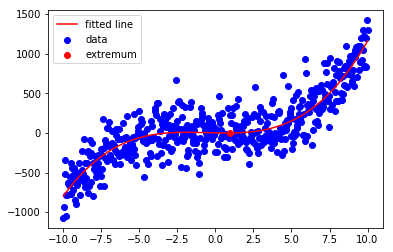

In [98]:
testFunction(3)
extremum = minimize(returnExtremum, 0)
plt.scatter(extremum.x, extremum.fun, c = 'r', label = 'extremum')

plt.legend()

### Доп. вопрос

Подберите коэфициенты многочлена с помощью системы линейных уравнений

In [81]:
def result_first(result_1, x):
    return result_1[0] + result_1[1]*x

def result_second(result_2, x):
    return result_2[0] + result_2[1]*x + result_2[2]*np.power(x,2)

def result_third(result_3, x):
    return result_3[0] + result_3[1]*x + result_3[2]*np.power(x,2) + result_3[3]*np.power(x,3)

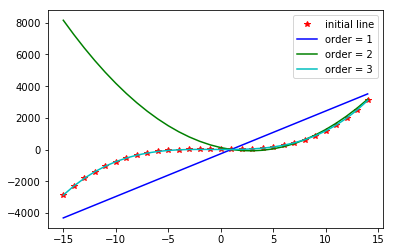

In [91]:
x = np.arange(-15,15, 1)

def f(x):
    return x**3 + 2*x**2 -3*x + 2
#inital line
plt.plot(x, f(x), '*', c = 'r', label = 'initial line')
#order = 1
a = np.array([[1,1],[1,15]])
b = np.array([f(1),f(15)])
result_1 = linalg.solve(a,b)
plt.plot(x,result_first(result_1, x),'b', label = 'order = 1')
#order = 2
a = np.array([[1,1,1],[1,8,64],[1,15,225]])
b = np.array([f(1),f(8),f(15)])
result_2 = linalg.solve(a,b)
plt.plot(x,result_second(result_2, x),'g', label = 'order = 2')
#order = 3
a = np.array([[1,1,1,1],[1,4,16,64],[1,10,100,1000],[1,15,225,15*15*15]])
b = np.array([f(1), f(4),f(10),f(15)])
result_3 = linalg.solve(a,b)
plt.plot(x,result_third(result_3, x),'c', label = 'order = 3')

plt.legend()